In [1]:
from ClassesSim import MCCTClassical
import numpy as np 
import matplotlib.pyplot as plt
from fractions import Fraction
def binder(param):
    return 1-np.average(param**4, axis=0)/(3*np.average(param**2,axis=0)**2)
def binderr(param):
    first = -1/(3*np.average(param**2,axis=0)**2) * np.std((param)**4,axis=0,ddof=1)/np.sqrt(len(param[:,0,0,0]))
    second = np.average(param**4, axis=0)/(np.average(param**2,axis=0)**3)*np.std(param*2,axis=0,ddof=1)/np.sqrt(len(param[:,0,0,0]))
    return np.sqrt(first**2+second**2)

In [2]:
MC = MCCTClassical(10,10,10,int(1e6)//100,[0,0.1,1,100],[0,50,100],5,-1,0,1)
MC.Simulation()

c:\Users\milkk\LabResearch\ClassesSim.py:117: RuntimeWarning: overflow encountered in exp
  return np.exp(-beta * (final - initial))*self.boltzmannMod


In [3]:
print(np.min(MC.recordtot))

-1.0


In [4]:
import pandas as pd
pd.DataFrame(np.average(MC.recordtot,axis=0)[-1])


,0,1,2
0,0.028,-0.012,-0.012
1,-0.124,-0.020,-0.096
2,-1.000,-1.000,-1.000
3,-0.840,-0.880,-0.880


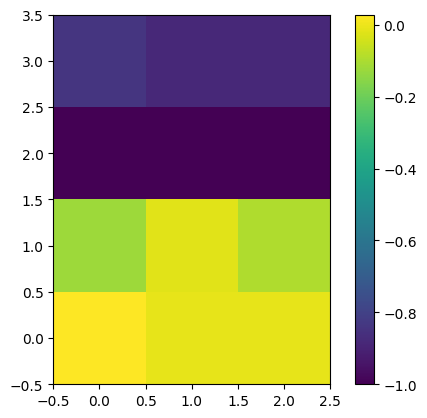

In [5]:
fig,ax=plt.subplots()
rec=ax.imshow(np.average(MC.recordtot,axis=0)[-1,:,:], origin='lower', interpolation='nearest')
fig.colorbar(rec, ax=ax, location ='right', shrink = 1)


In [6]:
test = MCCTClassical(4,4,10,100000,[0,0.1,1,10],[0,50,100],10,-1)
test.createLattice()
for i in range(test.numChains):
    if i%2==0:
        test.lattice[i]=0b1010
    else:
        test.lattice[i]=0b0101
print(test.LatticeOrderParameter(),test.lattice)
for i in test.lattice:
    print(bin(i))

1.0 [10  5 10  5]
0b1010
0b101
0b1010
0b101


In [13]:
for i in range(test.numChains):
    test.lattice[i]=0b1111

In [14]:
r1=0
r2=0
for i in range(test.numChains):
        r1+= (bin(test.left(test.lattice[i])^test.lattice[i]).count('1'))
        r2+= (bin(test.lattice[i]^test.lattice[i-1]).count('1'))

r2=  (2*r2/(test.latticeSize)-1)/2
r1 = (2*r1/(test.latticeSize)-1)/2
print(r1,r2)

-0.5 -0.5


In [15]:
test.LatticeOrderParameter()

-1.0

In [16]:
test.order_parameter(0b1111),test.order_parameter(0)

(-1.0, -1.0)

In [11]:
num = 0b1111
num2 = test.dec2int(Fraction(1,3))
x=bin(test.left(num2)^num2).count('1')
2*x/4-1

1.0

In [21]:
test.order_parameter(0b1010)

1.0